### Importing libraraies

In [711]:
# import os
# import datetime

# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# import tensorflow as tf

# from tensorflow import keras
# from tensorflow.keras import layers

# tf.keras.backend.clear_session()

In [712]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt   

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

### Loading Dataset

#### Lower Back Pain Symptoms Dataset

Source: https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [713]:
spine_data = pd.read_csv('dataset/Dataset_spine.csv', 
                         skiprows=1,
                         names=['pelvic_incidence',
                                'pelvic tilt',
                                'lumbar_lordosis_angle',
                                'sacral_slope',
                                'pelvic_radius',
                                'degree_spondylolisthesis',
                                'pelvic_slope',
                                'direct_tilt',
                                'thoracic_slope',
                                'cervical_tilt',
                                'sacrum_angle',
                                'scoliosis_slope',
                                'class_att'])

spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [714]:
spine_data.head().T

,0,1,2,3,4
pelvic_incidence,84.585607,72.076278,26.147921,36.125683,58.101935
pelvic tilt,30.361685,18.946176,10.759454,22.758753,14.837639
lumbar_lordosis_angle,65.479486,51.0,14.0,29.0,79.649838
sacral_slope,54.223922,53.130102,15.388468,13.366931,43.264295
pelvic_radius,108.010218,114.213013,125.203296,115.577116,113.587655
degree_spondylolisthesis,25.118478,1.010041,-10.093108,-3.237562,50.237878
pelvic_slope,0.341665,0.084621,0.391971,0.126474,0.951361
direct_tilt,30.4108,12.6031,9.871,25.6206,33.904
thoracic_slope,15.7092,9.6504,8.6406,15.7438,11.6354
cervical_tilt,11.58279,10.87581,15.78046,11.5561,12.20428


In [715]:
spine_data.shape

(310, 13)

In [716]:
spine_data.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class_att'],
      dtype='object')

In [717]:
spine_data['class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [718]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


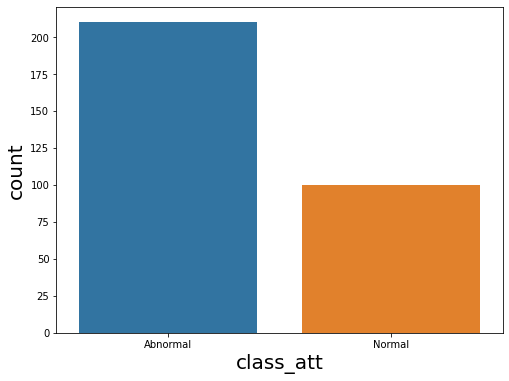

In [719]:
plt.figure(figsize=(8, 6))

sns.countplot('class_att', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('count', fontsize = 20)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


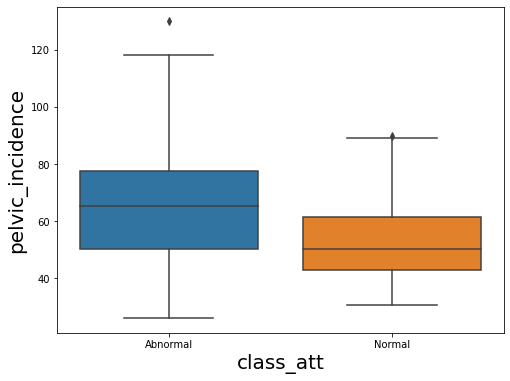

In [720]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_incidence', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_incidence', fontsize = 20)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


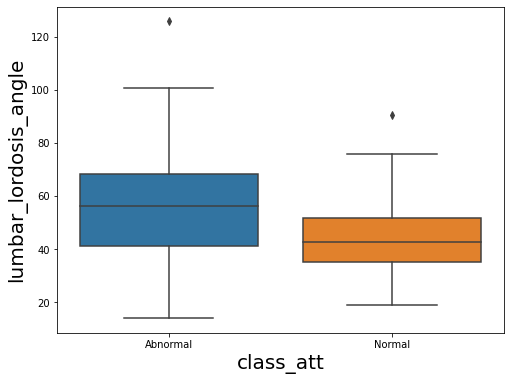

In [721]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'lumbar_lordosis_angle', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('lumbar_lordosis_angle', fontsize = 20)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


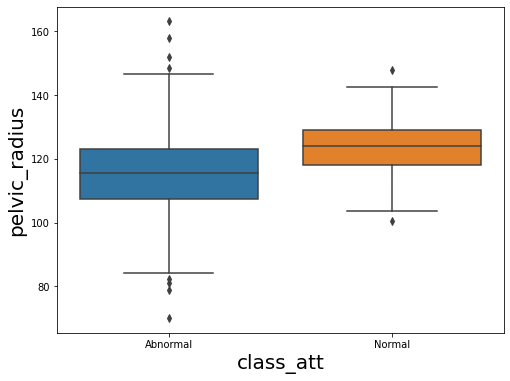

In [722]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_radius', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_radius', fontsize = 20)

plt.show()

### Replacing string values with integers in target column

In [723]:
class_att = {'Abnormal':0, 'Normal':1}

spine_data['class_att'].replace(class_att, inplace=True)

spine_data[['class_att']].sample(10)

,class_att
76,0
291,0
224,0
124,0
61,0
51,1
233,0
197,1
149,0
306,0


In [724]:
features = spine_data.drop('class_att', axis=1)

target = spine_data[['class_att']]

In [725]:
features.sample(5).T

,30,83,55,244,29
pelvic_incidence,65.013773,41.767732,33.041688,50.819268,57.145851
pelvic tilt,9.838262,17.899402,-0.324678,15.402213,16.489091
lumbar_lordosis_angle,57.735837,20.030886,19.071075,42.528939,42.842148
sacral_slope,55.175511,23.868330,33.366366,35.417055,40.656760
pelvic_radius,94.738525,118.363389,120.388611,112.192804,113.806178
degree_spondylolisthesis,49.696955,2.062963,9.354365,10.869566,5.015186
pelvic_slope,0.151994,0.371351,0.167309,0.678987,0.223550
direct_tilt,14.398600,21.113600,17.196000,7.110300,25.748500
thoracic_slope,8.902400,7.164600,11.246600,7.248100,9.509200
cervical_tilt,10.842950,9.820290,9.144630,9.947850,7.062950


In [726]:
target.sample(5)

,class_att
166,0
52,1
43,0
77,0
211,0


In [727]:
standardScaler = StandardScaler()

scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                               columns=features.columns,
                               index=features.index)

scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-8.595275e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic tilt,310.0,2.206121e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,1.833659e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-1.317942e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,4.068430e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,-1.432546e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350
pelvic_slope,310.0,3.438110e-17,1.001617,-1.646397,-0.871329,0.010547,0.812640,1.842974
direct_tilt,310.0,8.487834e-17,1.001617,-1.657245,-0.958454,0.067895,0.884884,1.788002
thoracic_slope,310.0,-2.578583e-16,1.001617,-1.775578,-0.779769,-0.037140,0.832300,1.844158
cervical_tilt,310.0,-4.383590e-16,1.001617,-1.697267,-0.828145,0.007103,0.844180,1.692090


In [728]:
scaled_features.shape

(310, 12)

### Splitting dataset into training and testing

In [729]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, 
                                                    target, 
                                                    test_size=0.15,
                                                    random_state=10)

In [730]:
x_train.shape, x_test.shape

((263, 12), (47, 12))

In [731]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.15,
                                                  random_state=10)

In [732]:
x_train.shape, x_val.shape, x_test.shape

((223, 12), (40, 12), (47, 12))

In [733]:
y_train.shape, y_val.shape, y_test.shape

((223, 1), (40, 1), (47, 1))

### Building model : Like  x = layers.Dense(...)

1. לבנות מבנה בצורת functional keras (טנסור אינפוט וטנסור אאוטפוט)
2. כמה נויורונים יהיו בכל שכבה
3. כתיבת פייתון מתקדם - שימוש בקלאס ובבנאי מודל.
4. פונקציית call שבונה עוד שכבות? 
5. להשתמש לא בsequantial רק מחלקות!
6. גם הקומפייל ליצור אותו בתוך הקלאס
7. גם האופטימייזר
8. 

לבנות מחלקה ולבצע לה אימון
לשמור משקולות ולהדגים במחברת טעינה מחדש.

# class SPINE

In [734]:
class Spine(keras.Model):
    
    def __init__(self, input_shape,lr=0.001, type="adam"):
    
        super(Spine, self).__init__()

        self.d1 = layers.Dense((input_shape*3), activation = 'elu', input_shape = [input_shape])
        self.d2 = layers.Dense((input_shape*2), activation = 'elu')
        
        self.d3 = layers.Dense(1, activation = 'sigmoid')
        self.cmp(type,lr)
        

    def cmp(self,opt,lr):
        if opt == 'adam':
            
            self.compile(optimizer = keras.optimizers.Adam(learning_rate=lr),
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])
        elif opt == 'sgd':
            self.compile(optimizer = keras.optimizers.SGD(lr = lr),
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])
        elif opt == 'rmsprop':
            self.compile(optimizer = keras.optimizers.RMSprop(lr = lr),
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])
        else:
            print("Adam is best optimizer, Dont be stopid choose Adam")
      

    def fit_func(self, x_train, y_train, x_val, y_val, epochs, batch_size):
        
        history=self.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
        return history

    def call(self, data):#<--------------------------------------forwared
        
        x = self.d1(data)
        x = self.d2(x)

        x = self.d3(x)
        
        return x

    def predict_func(self, x_test,y_test ):
        score = self.evaluate(x_test, y_test)
        score_df = pd.Series(score, index = self.metrics_names)

        return score_df

 
    def save_model_json(self, path):
        # self.save_model_json(path)
        model = tf.keras.Sequential([
        self.d1,
        self.d2,
        self.d3 ])
        js = model.to_json()
        import pprint
        pprint.pprint(js)
        with open(path, 'w') as f:
            f.write(js)
            
    def save_weights_model(self, path):
        
        model = tf.keras.Sequential([
        self.d1,
        self.d2,
        self.d3 ])

        model.save_weights("wwww")
    
    
        
        
    


    # def graphs

    # def early stoppin
    # checkpoint
    
    

    

    


    

model = Spine(input_shape = x_train.shape[1])


In [735]:
model.fit_func(x_train, y_train, x_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.3991 - val_loss: 0.0000e+00 - val_accuracy: 0.4750
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4978 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5919 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6861 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7040 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7354 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7758 - val_loss: 0.00

In [736]:
model.predict_func(x_test, y_test)

2/2 [==============================] - 0s 971us/step - loss: 0.0000e+00 - accuracy: 0.7021


loss        0.000000
accuracy    0.702128
dtype: float64

In [737]:
# save model to json
model.save_model_json("model.json")
model.save_weights_model("weighs")


('{"class_name": "Sequential", "config": {"name": "sequential_22", "layers": '
 '[{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 12], '
 '"dtype": "float32", "sparse": false, "ragged": false, "name": '
 '"dense_93_input"}}, {"class_name": "Dense", "config": {"name": "dense_93", '
 '"trainable": true, "batch_input_shape": [null, 12], "dtype": "float32", '
 '"units": 36, "activation": "elu", "use_bias": true, "kernel_initializer": '
 '{"class_name": "GlorotUniform", "config": {"seed": null}}, '
 '"bias_initializer": {"class_name": "Zeros", "config": {}}, '
 '"kernel_regularizer": null, "bias_regularizer": null, '
 '"activity_regularizer": null, "kernel_constraint": null, "bias_constraint": '
 'null}}, {"class_name": "Dense", "config": {"name": "dense_94", "trainable": '
 'true, "dtype": "float32", "units": 24, "activation": "elu", "use_bias": '
 'true, "kernel_initializer": {"class_name": "GlorotUniform", "config": '
 '{"seed": null}}, "bias_initializer": {"class_nam

# load model:

In [738]:
#load model
import json
with open('model.json', 'r') as infile: 
    
    model_json = json.load(infile)



In [739]:
pprint.pprint(model_json)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 12],
                                   'dtype': 'float32',
                                   'name': 'dense_93_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 12],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kerne

In [740]:
model = tf.keras.models.model_from_json(json.dumps(model_json))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 36)                468       
                                                                 
 dense_94 (Dense)            (None, 24)                888       
                                                                 
 dense_95 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


# without weights

In [741]:
y_pred_after_loading = model.predict(x_test)
# r2 score import
from sklearn.metrics import r2_score

r2_score( y_test,y_pred_after_loading)

2/2 [==============================] - 0s 991us/step


-0.30865318013246545

# adding weights

In [742]:
# load weights into new model
model.load_weights("wwww")


In [743]:
y_pred_after_loading = model.predict(x_test)
# r2 score import
from sklearn.metrics import r2_score

r2_score( y_test,y_pred_after_loading)

2/2 [==============================] - 0s 1ms/step


-0.2998264302902771